In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
np.random.seed(2137)

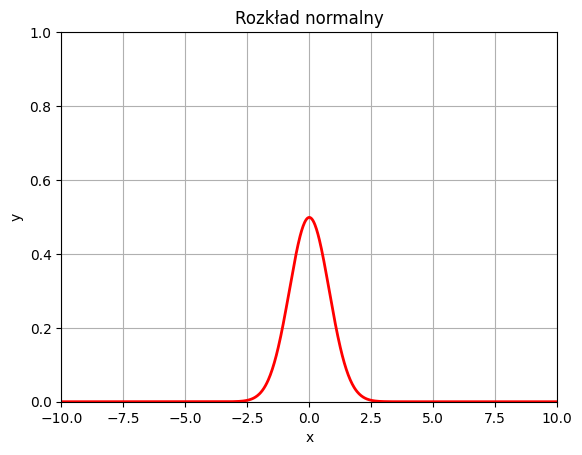

In [52]:
h = 0.8
mu = 0

x=None
y=None

x = np.linspace(-10.0, 10.0, num=1000)
y = 1/(np.sqrt(2 * np.pi)*h) * np.exp( -((x - mu)/h)**2/2 )
plt.plot(x, y, linewidth=2, color='r')

plt.title("Rozkład normalny")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([-10, 10])
plt.ylim([0, 1])
plt.grid()

plt.show()

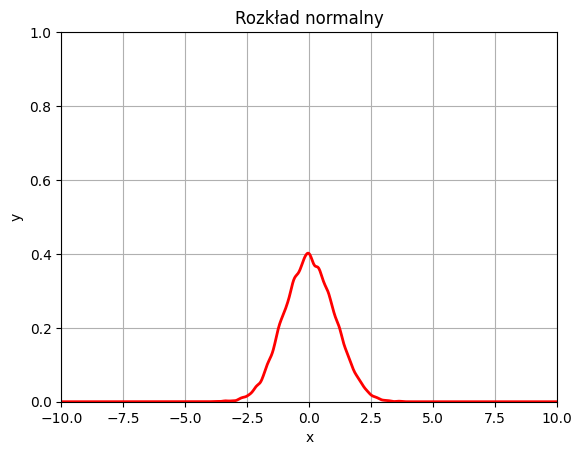

In [53]:
h = 0.1
m = 10000

def xi():
    return np.random.normal(0,1)

x = np.linspace(-10.0, 10.0, num=1000)
y = np.stack([1/(np.sqrt(2 * np.pi)) * np.exp( -((x - xi())/h)**2/2 ) for _ in range(m)])
y = np.sum(y, axis=0)/(m*h)

plt.plot(x, y, linewidth=2, color='r')

plt.title("Rozkład normalny")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([-10, 10])
plt.ylim([0, 1])
plt.grid()

plt.show()

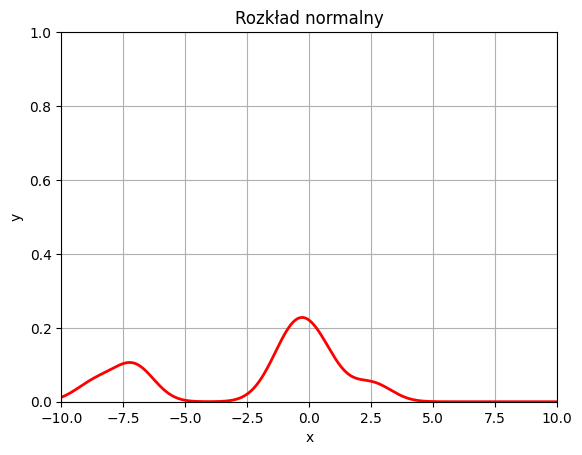

In [54]:
h = 0.8
m = 10

x1 = np.concatenate([np.random.normal(-7,1,int(0.3*m)), 
                     np.random.normal(0,1,int(0.6*m)),
                     np.random.normal(3,1,int(0.1*m))])

x = np.linspace(-10.0, 10.0, num=1000)
y = np.stack([1/(np.sqrt(2 * np.pi)) * np.exp( -((x - x1[i])/h)**2/2 ) for i in range(m)])
y = np.sum(y, axis=0)/(m*h)

plt.plot(x, y, linewidth=2, color='r')

plt.title("Rozkład normalny")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([-10, 10])
plt.ylim([0, 1])
plt.grid()

plt.show()

In [55]:
def calculate_h(m, x):
    V = 1/(m-1) * np.sum(np.power(x,2)) - 1/(m*(m-1))*(np.sum(x)**2)
    print(V)

    sigma = np.sqrt(V)
    c8 = 105/(32 * np.sqrt(np.pi) * sigma**9 )
    print(c8)

    K_6 = -15/np.sqrt(2*np.pi)
    U_K = 1

    hII = ((-2*K_6)/(U_K*c8*m))**(1/9)
    print(hII)

    def K_6_x(x):
        return 1/(np.sqrt(2*np.pi)) * (x**6 - 15*x**4 + 45*x**2-15) * np.exp(-1/2*x**2) 
    xi = 6
    C_6_hII = 1/(m**2 * hII**(xi+1)) * np.sum(np.array([K_6_x(i/hII) for i in x]))
    print(C_6_hII)

    K_4 = 3/(np.sqrt(2*np.pi))
    hI = ((-2*K_4)/(U_K*C_6_hII*m))**(1/7)
    print(hI)

    def K_4_x(x):
        return 1/(np.sqrt(2*np.pi)) * (x**4 - 6*x**2 + 3) * np.exp(-1/2*x**2) 
    xi = 4
    C_4_hI = 1/(m**2 * hI**(xi+1)) * np.sum(np.array([K_4_x(i/hI) for i in x]))
    print(C_4_hI)

    Z_f = C_4_hI
    print(Z_f)

    U_K = 1
    W_K = 1/(2*np.sqrt(np.pi))
    h=( (W_K)/(U_K**2 * Z_f * m) )**(1/5)
    print(h)
    
    return h

33.43350023363371
2.562394987021784e-07
3.3023308578972115
-7.10233882591969e-09
6.161205638122084
4.326995893434064e-09
4.326995893434064e-09
9.179979618828023


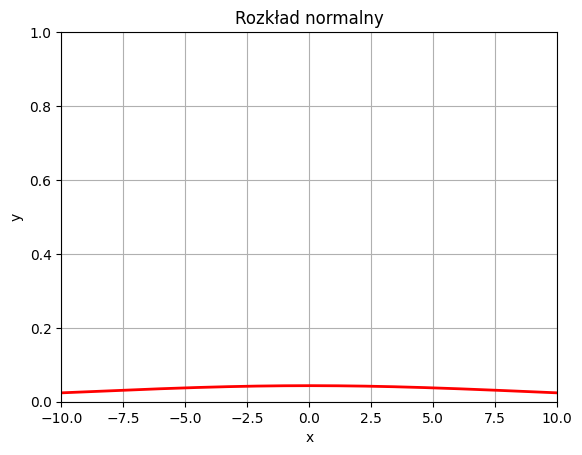

In [56]:
for m in [1000]:
    mu = 0

    x = None
    y = None

    x = np.linspace(-10.0, 10.0, num=m)

    h = calculate_h(m, x)
    
    y = 1/(np.sqrt(2 * np.pi)*h) * np.exp( -((x - mu)/h)**2/2 )
    plt.plot(x, y, linewidth=2, color='r')

    plt.title("Rozkład normalny")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim([-10, 10])
    plt.ylim([0, 1])
    plt.grid()

    plt.show()

z tego z dzisiaj robiliśmy 2 modale
dla jakich m sie polepsza 
wsadzmy h z tego algorytmu który wysłał
dla m =10 m=100 jakie h wychodzi powinno wychodzic mniejsze dla m=1000 m=10000 czy garby są dobrze odzerowania
jesli beda bliższe siebie 
h im m wieksze tym h mniejsze
jeśli te są blizsze 

k najbliszych sąsiadów 3 sigm i na podstawie estymatorów jądrowych 